# Analyze Dashboard Data
If the script doesn't display properly (e.g. curly braces in the markdown) **trust the notebook** in the top right corner and rerender the markdown by running them again.


In [6]:
from ipywidgets import FileUpload
upload = FileUpload(accept='.json',
    multiple=False)
upload

FileUpload(value={}, accept='.json', description='Upload')

Make sure that you click and run the cell below after having chosen the correct .json file

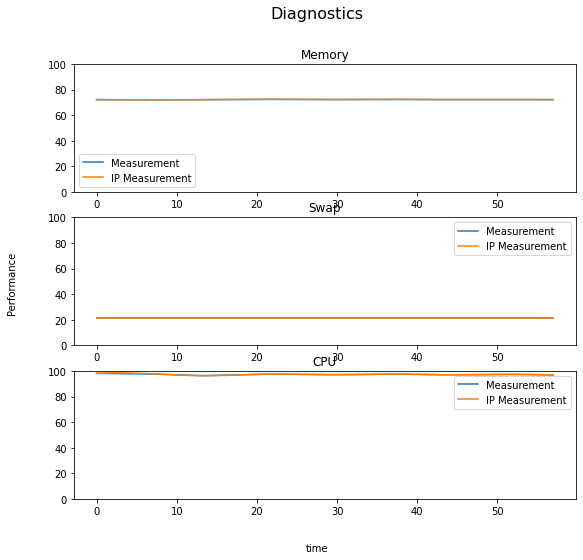

In [8]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate


assert upload.data, 'File missing, please upload in above cell'
data = json.loads(upload.data[0].decode('utf-8'))


meas_name = ['Memory', 'Swap', 'CPU']

bm_data = np.array([[],[],[],[]])
t0= data['resources_stats'][0]['time']

for meas in data['resources_stats']:
    dat = np.array([[meas['time']-t0, meas['memory']['used']/meas['memory']['total']*100, meas['swap']['used']/meas['swap']['total']*100, meas['cpu']['pcpu']]])
    bm_data = np.append(bm_data, dat.T, axis=1)


time_ip = np.linspace(bm_data[0][0], bm_data[0][-1], 100) 
bm_ip = np.array([time_ip])

fig, axes= plt.subplots(3, 1, figsize=(9, 8))
fig.text(0.5, 0.04, 'time', ha='center', va='center')
fig.text(0.03, 0.5, 'Performance', ha='center', va='center', rotation='vertical')

for i in range(len(bm_data)-1):
    tck = interpolate.splrep(bm_data[0], bm_data[i+1], s=0)
    ip = np.array([interpolate.splev(bm_ip[0], tck, der=0)])
    bm_ip = np.append(bm_ip, ip, axis=0)
    
    
    axes[i].plot(bm_data[0], bm_data[i+1], bm_ip[0], bm_ip[i+1])
    axes[i].legend(['Measurement', 'IP Measurement'])
    axes[i].set_title(meas_name[i])
    axes[i].set_ylim(0, 100)
    
    
fig.suptitle('Diagnostics', fontsize=16)
plt.show()